# Drug Dataset
The dataset contains collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

The goal is to build a decision tree classifier model to find out which drug might be appropriate for a future patient with the same illness. 

In [7]:
import pandas as pd
import numpy as np 

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [8]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv", delimiter=",")
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
features = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
labels = df["Drug"]


### dummies or encoding!

In [11]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
features[:,1] = le_sex.transform(features[:,1])

In [12]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
features[:,2] = le_BP.transform(features[:,2])

In [13]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
features[:,3] = le_Chol.transform(features[:,3])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


In [15]:
tr = DecisionTreeClassifier(criterion="entropy", max_depth=4,  min_samples_split=5)
tr.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
y_pred_tr= tr.predict(X_train)
y_pred_tr

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA', 'drugY', 'drugB', 'drugY', 'drugX',
       'drugY', 'drugA', 'drugX', 'drugC', 'drugC', 'drugA', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugA',
       'drugX', 'drugB', 'drugA', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugC', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugB', 'drugX', 'drugX', 'drugA', 'drugX', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugC', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugA', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugY', 'drugA', 'drugY', 'drugB', 'drugX',
       'drugX', 'drugB', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugY', 'dru

In [17]:
y_pred_te= tr.predict(X_test)
y_pred_te

array(['drugB', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugC', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugA', 'drugY', 'drugA', 'drugY', 'drugA',
       'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugA',
       'drugX', 'drugY', 'drugB', 'drugY', 'drugY'], dtype=object)

In [18]:
print("Accuracy : ", metrics.accuracy_score(y_train, y_pred_tr))
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_te))

Accuracy :  1.0
Accuracy :  1.0


In [19]:
print(classification_report(y_test, y_pred_te))
print(confusion_matrix(y_test, y_pred_te))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00         9
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 6  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 19]]


In [21]:
def train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth):
    dtr = DecisionTreeClassifier(max_depth = max_depth)
    dtr.fit(X_train,Y_train)
    Y_train_pred = dtr.predict(X_train)
    Y_test_pred = dtr.predict(X_test)
#     featurecol = np.array(list(features.columns))
    plt.figure(figsize=[20,14])
    tree.plot_tree(dtr, filled=True) #, feature_names=featurecol
    plt.show()

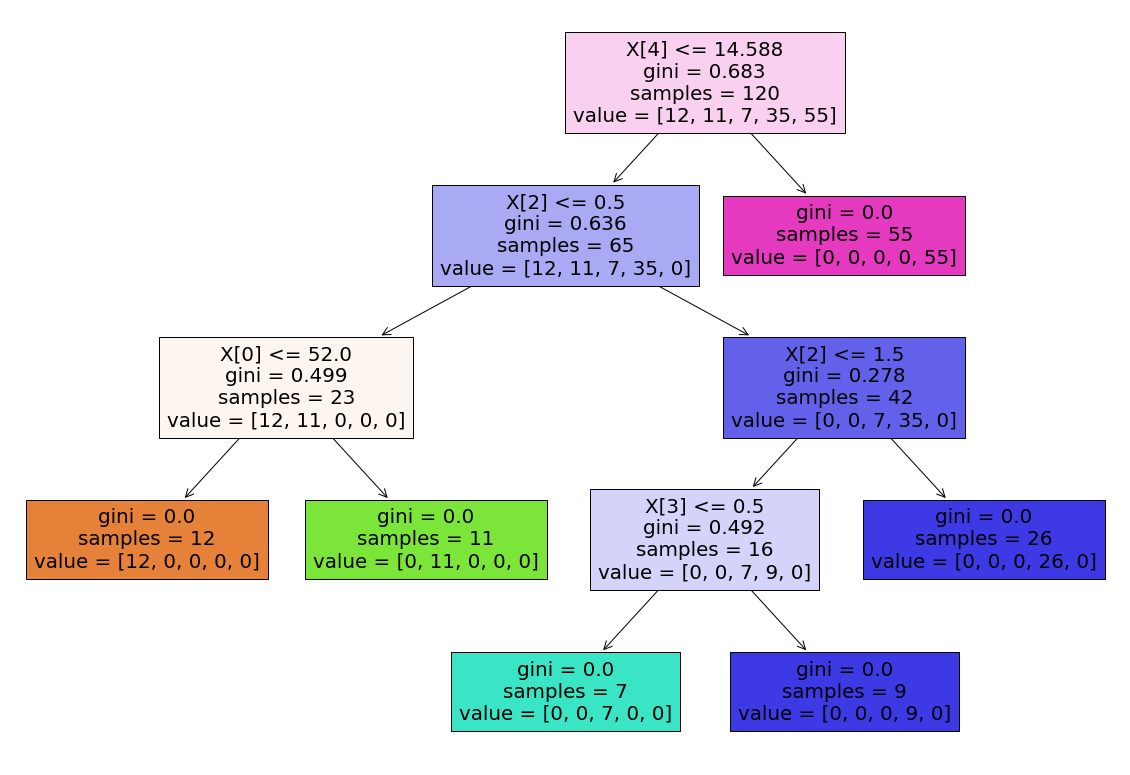

In [22]:
train_and_plot_tree(X_train, y_train, X_test, y_test, max_depth =4)


In [24]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(tr,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()